In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import csv

In [2]:
us_zcta_path = './zcta_data/tl_rd22_us_zcta520.shp'
us_zcta_data = gpd.read_file(us_zcta_path)
us_zcta_data['ZCTA5CE20'] = us_zcta_data['ZCTA5CE20'].astype(int)

In [3]:
slc_zcta_list_path = './zcta_data/slc_zcta.csv'

slc_zcta_list = []

with open(slc_zcta_list_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        int_row = [int(i) for i in row]
        slc_zcta_list.append(int_row)
        
slc_zcta_list = [item for sublist in slc_zcta_list for item in sublist]

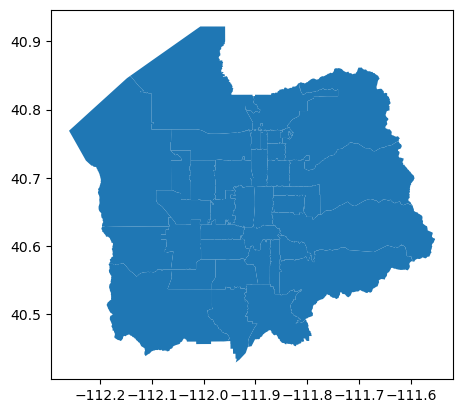

In [5]:
slc_zcta_data = us_zcta_data[us_zcta_data['ZCTA5CE20'].isin(slc_zcta_list)]

slc_zcta_data = slc_zcta_data.rename(columns={'ZCTA5CE20': 'ZCTA5'})

slc_zcta_data.plot()
plt.show()

In [8]:
# slc_zcta_data.to_file('./zcta_data/slc_zcta.shp')

slc_zcta_data.head()

,ZCTA5,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
1443,84070,84070,B5,G6350,S,19004717,0,+40.5771115,-111.8891029,"POLYGON ((-111.92159 40.57902, -111.92140 40.5..."
1445,84108,84108,B5,G6350,S,187120680,381009,+40.8090403,-111.7275160,"POLYGON ((-111.84774 40.75849, -111.84726 40.7..."
1616,84096,84096,B5,G6350,S,184045743,128519,+40.4870371,-112.0999829,"POLYGON ((-112.18765 40.51390, -112.18754 40.5..."
1625,84129,84129,B5,G6350,S,17271536,0,+40.6535775,-111.9620632,"POLYGON ((-111.99152 40.63448, -111.99110 40.6..."
1631,84084,84084,B5,G6350,S,17196254,0,+40.6213910,-111.9660607,"POLYGON ((-112.00622 40.62649, -112.00602 40.6..."
